In [110]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '25dd9dc5-9820-4737-86a0-febb908ccc88',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2024-10-29T14:16:44.177Z', 'error_code': 0, 'error_message': None, 'elapsed': 219, 'credit_count': 1, 'notice': None, 'total_count': 9877}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11792, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

In [111]:
import pandas as pd

pd.set_option('display.max_columns', None)

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11792,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.000000,19774771.000000,19774771.000000,False,NaN,1,NaN,NaN,None,2024-10-29T14:13:00.000Z,71639.478591,48390511303.076874,84.177000,0.803700,4.020308,6.302775,8.939096,20.620290,7.653706,1416654283686.612305,58.633100,1504429050400.580078,None,2024-10-29T14:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-29 14:16:45.912102
1,1027,Ethereum,ETH,ethereum,9466,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120404808.843104,120404808.843104,True,NaN,2,NaN,NaN,None,2024-10-29T14:13:00.000Z,2632.008758,21257779551.227631,52.578700,0.610781,4.435462,-0.034641,-0.848143,4.640822,-21.105565,316906511418.484253,13.116300,316906511418.479980,None,2024-10-29T14:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-29 14:16:45.912102
2,825,Tether USDt,USDT,tether,101869,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,120245583212.678009,121337925861.561707,True,NaN,3,NaN,NaN,None,2024-10-29T14:13:00.000Z,0.999627,78500786880.138306,59.466500,0.033866,0.037619,0.041572,-0.056090,-0.047178,0.005650,120200690145.449081,4.974900,121292624973.850006,None,2024-10-29T14:13:00.000Z,1027.000000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-10-29 14:16:45.912102
3,1839,BNB,BNB,bnb,2272,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,145931001.577217,145931001.577217,False,NaN,4,NaN,NaN,None,2024-10-29T14:13:00.000Z,606.438331,1754003257.305687,15.073000,0.343178,2.015299,1.836162,1.432351,12.625857,3.193050,88498153005.510590,3.666300,88498153005.509995,None,2024-10-29T14:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-29 14:16:45.912102
4,5426,Solana,SOL,solana,775,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,470267861.747121,587390378.897205,True,NaN,5,NaN,NaN,None,2024-10-29T14:13:00.000Z,179.143718,3865989193.942023,32.757000,0.131339,2.496467,6.605145,13.943983,29.049757,-2.225368,84245533270.276657,3.490100,105227296469.250000,None,2024-10-29T14:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-29 14:16:45.912102
5,3408,USDC,USDC,usd-coin,22714,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,34647740890.766487,34647740890.766487,False,NaN,6,NaN,NaN,None,2024-10-29T14:13:00.000Z,0.999924,8506184965.991031,57.123100,0.015531,-0.024508,0.014717,-0.004764,-0.004984,-0.001545,34645120150.315216,1.435400,34645120150.320000,None,2024-10-29T14:13:00.000Z,1027.000000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-10-29 14:16:45.912102
6,52,XRP,XRP,xrp,1413,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.000000,56811862950.000000,99987068281.000000,False,NaN,7,NaN,NaN,None,2024-10-29T14:13:00.000Z,0.526489,976334549.173760,38.506200,0.501270,1.748284,-1.384434,-16.558650,-6.162168,-18.872758,29910796549.270103,1.239100,52648857115.620003,None,2024-10-29T14:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-29 14:16:45.912102
7,74,Dogecoin,DOGE,dogecoin,1090,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,146569336383.705261,146569336383.705261,True,NaN,8,NaN,NaN,None,2024-10-29T14:13:00.000Z,0.168611,3745770062.531692,97.946100,1.361189,14.434056,20.045229,33.28

In [112]:
def api_runner():

  global df
  from requests import Request, Session
  from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
  import json

  url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
  parameters = {
    'start':'1',
    'limit':'15',
    'convert':'USD'
  }
  headers = {
    'Accepts': 'application/json',
    'X-CMC_PRO_API_KEY': '25dd9dc5-9820-4737-86a0-febb908ccc88',
  }

  session = Session()
  session.headers.update(headers)

  try:
    response = session.get(url, params=parameters)
    data = json.loads(response.text)
    print(data)
  except (ConnectionError, Timeout, TooManyRedirects) as e:
    print(e)


  df = pd.json_normalize(data['data'])
  df['timestamp'] = pd.to_datetime('now')
  df

  if not os.path.isfile(r'C:\Users\Admin\Desktop\2024\m\python script\API.csv'):
    df.to_csv(r'C:\Users\Admin\Desktop\2024\m\python script\API.csv', header='column_names')
  else:
    df.to_csv(r'C:\Users\Admin\Desktop\2024\m\python script\API.csv',mode = 'a',header=False)


In [113]:
import os
from time import time
from time import sleep


for i in range(300):
  api_runner()
  print('API Runner is successfully completed')
  sleep(60)

exit()

{'status': {'timestamp': '2024-10-29T14:16:50.913Z', 'error_code': 0, 'error_message': None, 'elapsed': 17, 'credit_count': 1, 'notice': None, 'total_count': 9877}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11792, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

KeyboardInterrupt: 

In [114]:
ndf = pd.read_csv(r'/content/C:\Users\Admin\Desktop\2024\m\python script\API.csv')

ndf


,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11792,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.000000,19774771.000000,19774771.000000,False,NaN,1,NaN,NaN,NaN,2024-10-29T14:13:00.000Z,71639.478591,48390511303.076874,84.177000,0.803700,4.020308,6.302775,8.939096,20.620290,7.653706,1416654283686.612305,58.633100,1504429050400.580078,NaN,2024-10-29T14:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-29 14:16:50.956879
1,1,1027,Ethereum,ETH,ethereum,9466,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120404808.843104,120404808.843104,True,NaN,2,NaN,NaN,NaN,2024-10-29T14:13:00.000Z,2632.008758,21257779551.227631,52.578700,0.610781,4.435462,-0.034641,-0.848143,4.640822,-21.105565,316906511418.484253,13.116300,316906511418.479980,NaN,2024-10-29T14:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-29 14:16:50.956879
2,2,825,Tether USDt,USDT,tether,101869,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,120245583212.677994,121337925861.561707,True,NaN,3,NaN,NaN,NaN,2024-10-29T14:13:00.000Z,0.999627,78500786880.138306,59.466500,0.033866,0.037619,0.041572,-0.056090,-0.047178,0.005650,120200690145.449081,4.974900,121292624973.850006,NaN,2024-10-29T14:13:00.000Z,1027.000000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-10-29 14:16:50.956879
3,3,1839,BNB,BNB,bnb,2272,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,145931001.577217,145931001.577217,False,NaN,4,NaN,NaN,NaN,2024-10-29T14:13:00.000Z,606.438331,1754003257.305687,15.073000,0.343178,2.015299,1.836162,1.432351,12.625857,3.193050,88498153005.510590,3.666300,88498153005.509995,NaN,2024-10-29T14:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-29 14:16:50.956879
4,4,5426,Solana,SOL,solana,775,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,470267861.747121,587390378.897205,True,NaN,5,NaN,NaN,NaN,2024-10-29T14:13:00.000Z,179.143718,3865989193.942023,32.757000,0.131339,2.496467,6.605145,13.943983,29.049757,-2.225368,84245533270.276657,3.490100,105227296469.250000,NaN,2024-10-29T14:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-29 14:16:50.956879
5,5,3408,USDC,USDC,usd-coin,22714,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,34647740890.766487,34647740890.766487,False,NaN,6,NaN,NaN,NaN,2024-10-29T14:13:00.000Z,0.999924,8506184965.991031,57.123100,0.015531,-0.024508,0.014717,-0.004764,-0.004984,-0.001545,34645120150.315216,1.435400,34645120150.320000,NaN,2024-10-29T14:13:00.000Z,1027.000000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-10-29 14:16:50.956879
6,6,52,XRP,XRP,xrp,1413,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.000000,56811862950.000000,99987068281.000000,False,NaN,7,NaN,NaN,NaN,2024-10-29T14:13:00.000Z,0.526489,976334549.173760,38.506200,0.501270,1.748284,-1.384434,-16.558650,-6.162168,-18.872758,29910796549.270103,1.239100,52648857115.620003,NaN,2024-10-29T14:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-29 14:16:50.956879
7,7,74,Dogecoin,DOGE,dogecoin,1090,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,146569336383.705261,146569336383.705261,True,NaN,8,NaN,NaN,NaN,2024-10-29T14:13:00.000Z,0.168611,3745770062.531692,97.946100,1.361189,14.434056,20.

In [115]:
ndf.head(2)

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11792,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.000000,19774771.000000,19774771.000000,False,NaN,1,NaN,NaN,NaN,2024-10-29T14:13:00.000Z,71639.478591,48390511303.076874,84.177000,0.803700,4.020308,6.302775,8.939096,20.620290,7.653706,1416654283686.612305,58.633100,1504429050400.580078,NaN,2024-10-29T14:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-29 14:16:50.956879
1,1,1027,Ethereum,ETH,ethereum,9466,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120404808.843104,120404808.843104,True,NaN,2,NaN,NaN,NaN,2024-10-29T14:13:00.000Z,2632.008758,21257779551.227631,52.578700,0.610781,4.435462,-0.034641,-0.848143,4.640822,-21.105565,316906511418.484253,13.116300,316906511418.479980,NaN,2024-10-29T14:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-29 14:16:50.956879


In [116]:
pd.set_option('display.float_format', lambda x: '%5f' %x)

ndf.head(2)

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11792,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.000000,19774771.000000,19774771.000000,False,NaN,1,NaN,NaN,NaN,2024-10-29T14:13:00.000Z,71639.478591,48390511303.076874,84.177000,0.803700,4.020308,6.302775,8.939096,20.620290,7.653706,1416654283686.612305,58.633100,1504429050400.580078,NaN,2024-10-29T14:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-29 14:16:50.956879
1,1,1027,Ethereum,ETH,ethereum,9466,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120404808.843104,120404808.843104,True,NaN,2,NaN,NaN,NaN,2024-10-29T14:13:00.000Z,2632.008758,21257779551.227631,52.578700,0.610781,4.435462,-0.034641,-0.848143,4.640822,-21.105565,316906511418.484253,13.116300,316906511418.479980,NaN,2024-10-29T14:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-29 14:16:50.956879


In [117]:
gdf = ndf.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
gdf

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.735869,3.909092,6.255005,8.911054,20.742232,7.720772
Ethereum,0.570193,4.356113,-0.084550,-0.861000,4.794620,-21.010073
Tether USDt,0.036480,0.051520,0.033613,-0.055414,-0.042388,0.007171
BNB,0.302881,1.966820,1.790068,1.435142,12.674500,3.216464
Solana,0.113200,2.421068,6.493164,13.895715,29.192629,-2.166660
USDC,0.022319,0.000339,0.014671,0.005562,0.010506,0.008117
XRP,0.482677,1.719093,-1.466496,-16.615433,-6.119031,-18.850528
Dogecoin,1.330981,14.495118,19.953232,33.410125,67.561408,32.906723
TRON,-0.033325,0.295047,2.868429,5.002835,2.022830,25.299091


In [118]:
gdf2 = gdf.stack()
gdf2

name                                   
Bitcoin    quote.USD.percent_change_1h      0.735869
           quote.USD.percent_change_24h     3.909092
           quote.USD.percent_change_7d      6.255005
           quote.USD.percent_change_30d     8.911054
           quote.USD.percent_change_60d    20.742232
                                             ...    
Chainlink  quote.USD.percent_change_24h     3.886882
           quote.USD.percent_change_7d     -6.156895
           quote.USD.percent_change_30d    -8.683553
           quote.USD.percent_change_60d     3.791467
           quote.USD.percent_change_90d   -13.145603
Length: 90, dtype: float64

In [119]:
type(gdf2)

pandas.core.series.Series

In [120]:
gdf3 = gdf2.to_frame(name='values')
gdf3

values
name                                             
Bitcoin   quote.USD.percent_change_1h    0.735869
          quote.USD.percent_change_24h   3.909092
          quote.USD.percent_change_7d    6.255005
          quote.USD.percent_change_30d   8.911054
          quote.USD.percent_change_60d  20.742232
...                                           ...
Chainlink quote.USD.percent_change_24h   3.886882
          quote.USD.percent_change_7d   -6.156895
          quote.USD.percent_change_30d  -8.683553
          quote.USD.percent_change_60d   3.791467
          quote.USD.percent_change_90d -13.145603

[90 rows x 1 columns]

In [121]:
gdf3.count()

,0
values,90


In [122]:
index = pd.Index(range(90))

gdf4 = gdf3.reset_index()
gdf4

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.735869
1,Bitcoin,quote.USD.percent_change_24h,3.909092
2,Bitcoin,quote.USD.percent_change_7d,6.255005
3,Bitcoin,quote.USD.percent_change_30d,8.911054
4,Bitcoin,quote.USD.percent_change_60d,20.742232
...,...,...,...
85,Chainlink,quote.USD.percent_change_24h,3.886882
86,Chainlink,quote.USD.percent_change_7d,-6.156895
87,Chainlink,quote.USD.percent_change_30d,-8.683553
88,Chainlink,quote.USD.percent_change_60d,3.791467


In [123]:
gdf5 = gdf4.rename(columns={'level_1':'percent_change'})
gdf5

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.735869
1,Bitcoin,quote.USD.percent_change_24h,3.909092
2,Bitcoin,quote.USD.percent_change_7d,6.255005
3,Bitcoin,quote.USD.percent_change_30d,8.911054
4,Bitcoin,quote.USD.percent_change_60d,20.742232
...,...,...,...
85,Chainlink,quote.USD.percent_change_24h,3.886882
86,Chainlink,quote.USD.percent_change_7d,-6.156895
87,Chainlink,quote.USD.percent_change_30d,-8.683553
88,Chainlink,quote.USD.percent_change_60d,3.791467


In [124]:
gdf5['percent_change'] = gdf5['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])

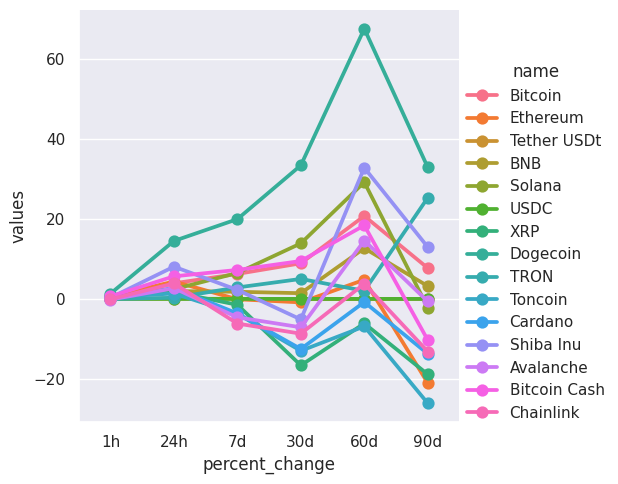

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(x = 'percent_change', y = 'values',hue = 'name', data = gdf5, kind = 'point')


In [126]:
df = ndf[['name','quote.USD.price','timestamp']]

df = df.query("name == 'Bitcoin'")
df

,name,quote.USD.price,timestamp
0,Bitcoin,71639.478591,2024-10-29 14:16:50.956879
15,Bitcoin,71615.046465,2024-10-29 14:17:51.127134
30,Bitcoin,71620.058686,2024-10-29 14:18:51.365589


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

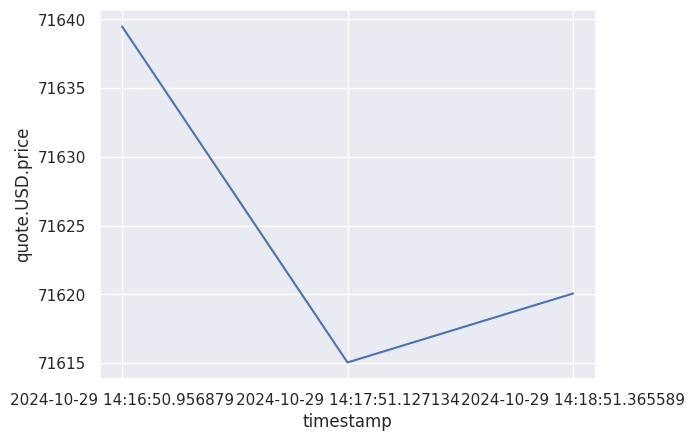

In [127]:
sns.lineplot(x = 'timestamp', y = 'quote.USD.price',data = df)
